In [3]:
### import libraries

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import gensim
import numpy as np
import spacy
import math

from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

import os, re, operator, warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justine.padayao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\justine.padayao\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justine.padayao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
def clean(text):
  return str(''.join([i if ord(i) < 128 else ' ' for i in text]))

test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'

In [5]:
text = open(lee_train_file).read()
nlp = spacy.load('en_core_web_lg')
stop_words = stopwords.words('english')

In [6]:
text

'Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year\'s Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at th

In [11]:
for stopword in stop_words:
  lexeme = nlp.vocab[stopword]
  lexeme.is_stop = True

In [12]:
doc = nlp(clean(text))

In [13]:
doc

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [16]:
texts, article = [], []
for w in doc:
  if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
    article.append(w.lemma_)
  if w.text == '\n':
    texts.append(article)
    article = []

In [17]:
texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'Southern',
  'Highlands',
  'New',
  'South',
  'Wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'Hill',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south',
  'west',
  'Sydney',
  'force',
  'closure',
  'Hume',
  'Highway',
  '4:00pm',
  'AEDT',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'Blue',
  'Mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'Hill',
  'New',
  'South',
  'Wales',
  'southern',
  'highland',
  'estimated',
  'resident',
  'leave',
  'home',
  'nearby',
  'Mittagong',
  'New',
  'South',
  'Wales',
  'Rural',
  'Fire',
  'Service',
  'say',
  'weather',
  'condition',
  'cause',
  'fire',
  'burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'Hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'New',
  'Year',
  'Eve',


In [18]:
transformed_texts = [' '.join(i) for i in texts]

In [21]:
transformed_texts_1 = [i.lower() for i in transformed_texts]

In [22]:
transformed_texts_2 = [re.sub(r'\w*\d\w*', '', i).strip() for i in transformed_texts_1]

In [47]:
transformed_texts_2

['hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fact pro

In [24]:
spacy.explain('ADJ')

'adjective'

### Activity 1: Find the number of unique adjectives

In [56]:
n_adj = 0
adjs = {}
for token in doc:
    if token.pos_ == 'ADJ':
        if token.text not in adjs.keys():
            n_adj += 1
        adjs[token.text] = n_adj
#     print(f'{token.text:20} {token.pos_:10} {spacy.explain(token.tag_)}')
print(n_adj)


955


### Bash's Solution for Activity 1

In [58]:
adj = []
for text in transformed_texts_2:
  doc = nlp(text)
  adj.append([token.text for token in doc if token.pos_ == 'ADJ'])

In [59]:
from itertools import chain
adj = list(chain(*adj))

In [61]:
adj

['southern',
 'new',
 'south',
 'strong',
 'huge',
 'new',
 'marked',
 'blue',
 'outlying',
 'new',
 'south',
 'southern',
 'new',
 'south',
 'rural',
 'optimistic',
 'new',
 'new',
 'south',
 'new',
 'south',
 'available',
 'close',
 'new',
 'little',
 'significant',
 'far',
 'associate',
 'indian',
 'suspect',
 'militant',
 'southern',
 'south',
 'pakistani',
 'militant',
 'extremist',
 'taiba',
 'jaish',
 'behest',
 'pakistani',
 'military',
 'military',
 'tat',
 'diplomatic',
 'taiba',
 'militant',
 'military',
 'national',
 'new',
 'few',
 'new',
 'south',
 'western',
 'northern',
 'free',
 'political',
 'economic',
 'interim',
 'key',
 'massive',
 'foreign',
 'new',
 'new',
 'new',
 'senior',
 'fresh',
 'bad',
 'international',
 'inappropriate',
 'unprofessional',
 'chief',
 'executive',
 'angry',
 'inappropriate',
 'senior',
 'federal',
 'safe',
 'afghani',
 'interim',
 'foreign',
 'long',
 'major',
 'long',
 'long',
 'mass',
 'pacific',
 'total',
 'temporary',
 'decisive',
 'si

In [62]:
adj = list(set(adj))
len(adj)

986

### Activity 2: Find the total number of unique entities

In [68]:
##ENTITIES
doc2 = nlp(" ".join([x for x in transformed_texts_2]))

doc2_ents = doc2.ents
entity = 0
ent_list = list()
for token in doc2_ents:
    if token.text not in ent_list:
        ent_list.append(token.text)
        entity +=1

495


In [69]:
print(entity)

495


In [70]:
doc2.ents

(today,
 sydney,
 claire richards,
 night,
 kilometer,
 dozen,
 india,
 india,
 pakistan,
 december,
 yesterday,
 hafiz mohammed,
 karachi,
 india,
 india,
 pakistan,
 week ago,
 week ago,
 end year,
 year,
 britain,
 afghanistan,
 today,
 monica seles jan michael,
 year old,
 minute year old,
 americans,
 tennis year,
 american,
 hundred,
 years eve,
 afternoon,
 thursday,
 overnight,
 friday,
 sydney,
 newcastle,
 morning,
 overnight,
 grafton,
 phil,
 picton,
 hour,
 sydney,
 picton,
 appin,
 morning,
 ten thousand,
 queensland,
 night,
 early evening,
 year eve,
 alejandro,
 pervez musharraf,
 pakistan,
 india,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 musharraf,
 india,
 pakistan,
 musharraf,
 indian,
 india,
 india,
 friday,
 vajpayee,
 january,
 india,
 india,
 pakistan,
 december,
 india,
 pakistan,
 pakistan,
 pakistan,
 abdul sattar,
 saturday,
 musharraf,
 sunday,
 pakistan,
 abdullah,
 british,
 israeli,
 palestinian,
 israeli,
 palestini

### TF-IDF

In [72]:
def IDF(corpus, unique_words):
  idf_dict = {}
  N = len(corpus)
  for i in unique_words:
    count = 0
    for sen in corpus:
      if i in sen.split():
        count = count+1
      idf_dict[i] = (math.log((N+1)/(count + 1)))+1
  return idf_dict

def fit(whole_data):
  unique_words = set()
  if isinstance(whole_data, (list,)):
    for x in whole_data:
      for y in x.split():
        if len(y)<2:
          continue
        unique_words.add(y)
    unique_words = sorted(list(unique_words))
    vocab = {j:i for i,j in enumerate(unique_words)}
    Idf_values_of_all_unique_words = IDF(whole_data, unique_words)
  return vocab, Idf_values_of_all_unique_words

def transform(dataset, vocabulary, idf_values):
  vocab = {}
  sparse_matrix = csr_matrix((len(dataset), len(vocabulary)),dtype = np.float64)
  for row in range(0, len(dataset)):
    number_of_words_in_sentence =  Counter(dataset[row].split())
    for word in dataset[row].split():
      if word in list(vocabulary.keys()):
        tf_idf_value = (number_of_words_in_sentence[word]/len(dataset[row].split()))*(idf_values[word])
        sparse_matrix[row,vocabulary[word]] = tf_idf_value
        vocab[word] = tf_idf_value
  return vocab

In [73]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_2)

In [74]:
idf_of_vocabulary

{'aamer': 6.0106352940962555,
 'aarage': 6.0106352940962555,
 'abandon': 5.0943445622221,
 'abate': 5.605170185988092,
 'abbott': 6.0106352940962555,
 'abc': 5.605170185988092,
 'abdel': 5.605170185988092,
 'abdomen': 6.0106352940962555,
 'abdominal': 6.0106352940962555,
 'abduct': 6.0106352940962555,
 'abduction': 6.0106352940962555,
 'abdul': 5.0943445622221,
 'abdullah': 5.605170185988092,
 'abegglen': 5.31748811353631,
 'abide': 6.0106352940962555,
 'ability': 4.912023005428146,
 'able': 3.870569130599985,
 'abloy': 5.31748811353631,
 'ablution': 6.0106352940962555,
 'ably': 6.0106352940962555,
 'aboard': 4.7578723256008875,
 'aboriginal': 5.31748811353631,
 'abortion': 6.0106352940962555,
 'abroad': 5.605170185988092,
 'abruptly': 6.0106352940962555,
 'abscond': 5.605170185988092,
 'absolutely': 4.506557897319982,
 'abstain': 6.0106352940962555,
 'abu': 4.912023005428146,
 'abuse': 4.506557897319982,
 'abusive': 5.605170185988092,
 'aca': 6.0106352940962555,
 'academic': 6.0106352

In [76]:
sorted_idf = dict(sorted(idf_of_vocabulary.items(), key = operator.itemgetter(1), reverse = True))

In [77]:
sorted_idf # Plotting the words by its weight

{'aamer': 6.0106352940962555,
 'aarage': 6.0106352940962555,
 'abbott': 6.0106352940962555,
 'abdomen': 6.0106352940962555,
 'abdominal': 6.0106352940962555,
 'abduct': 6.0106352940962555,
 'abduction': 6.0106352940962555,
 'abide': 6.0106352940962555,
 'ablution': 6.0106352940962555,
 'ably': 6.0106352940962555,
 'abortion': 6.0106352940962555,
 'abruptly': 6.0106352940962555,
 'abstain': 6.0106352940962555,
 'aca': 6.0106352940962555,
 'academic': 6.0106352940962555,
 'accc': 6.0106352940962555,
 'accelerate': 6.0106352940962555,
 'acceptable': 6.0106352940962555,
 'accolade': 6.0106352940962555,
 'accommodation': 6.0106352940962555,
 'accountable': 6.0106352940962555,
 'accounting': 6.0106352940962555,
 'accrue': 6.0106352940962555,
 'accuracy': 6.0106352940962555,
 'accusation': 6.0106352940962555,
 'achievement': 6.0106352940962555,
 'acquisition': 6.0106352940962555,
 'activist': 6.0106352940962555,
 'actress': 6.0106352940962555,
 'adams': 6.0106352940962555,
 'adhere': 6.010635

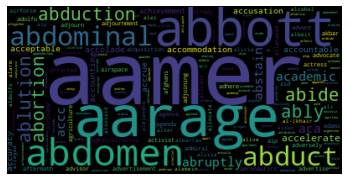

In [79]:
wordcloud = WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [81]:

stop_words.extend(['aamer'])
stopwords_dict = Counter(stop_words)
transformed_texts_3 = [' '.join([word for word in i.split() if word not in stopwords_dict]) for i in transformed_texts_2]

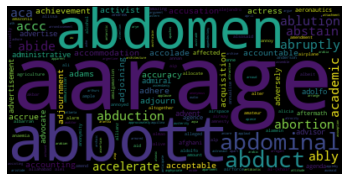

In [82]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_3)
wordcloud = WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [83]:
final_output = transform(transformed_texts_3, Vocabulary, idf_of_vocabulary)

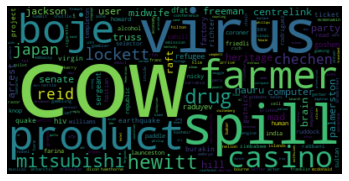

In [84]:
wordcloud = WordCloud().generate_from_frequencies(final_output)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Shortcut of TFIDF**

In [88]:
tfidf = TfidfVectorizer(sublinear_tf = True, norm = 'l2', min_df = 5, encoding= 'latin-1', ngram_range = (1,1), stop_words = stop_words)
features = tfidf.fit_transform(transformed_texts_3)
d = tfidf.vocabulary_

In [92]:
### VADER

sid = SentimentIntensityAnalyzer()
for i in range(len(transformed_texts_3)):
  print(transformed_texts_3[i] + ':')
  scores = sid.polarity_scores(transformed_texts_3[i])
  print(scores)

hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fact proba

### Topic Modelling

In [93]:
texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'Southern',
  'Highlands',
  'New',
  'South',
  'Wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'Hill',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south',
  'west',
  'Sydney',
  'force',
  'closure',
  'Hume',
  'Highway',
  '4:00pm',
  'AEDT',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'Blue',
  'Mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'Hill',
  'New',
  'South',
  'Wales',
  'southern',
  'highland',
  'estimated',
  'resident',
  'leave',
  'home',
  'nearby',
  'Mittagong',
  'New',
  'South',
  'Wales',
  'Rural',
  'Fire',
  'Service',
  'say',
  'weather',
  'condition',
  'cause',
  'fire',
  'burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'Hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'New',
  'Year',
  'Eve',


In [95]:
bigram = gensim.models.Phrases(texts)
texts = [bigram[line] for line in texts]

In [96]:
texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'Southern',
  'Highlands',
  'New_South',
  'Wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'Hill',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south_west',
  'Sydney',
  'force',
  'closure',
  'Hume',
  'Highway',
  '4:00pm',
  'AEDT',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'Blue_Mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'Hill',
  'New_South',
  'Wales',
  'southern',
  'highland',
  'estimated',
  'resident',
  'leave',
  'home',
  'nearby',
  'Mittagong',
  'New_South',
  'Wales',
  'Rural_Fire',
  'Service',
  'say',
  'weather_condition',
  'cause',
  'fire_burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'Hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'New',
  'Year',
  'Eve',
  'New_South',
  'Wales',
  'fire',
  'c

In [97]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [98]:
corpus # vector representation of the whole document

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 2),
  (10, 3),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 4),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 3),
  (23, 1),
  (24, 4),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 5),
  (56, 2),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 3),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 1),
  (90, 4),
  (91, 1)

In [99]:
# LSI Application

lsimodel = LsiModel(corpus = corpus, num_topics = 10, id2word = dictionary)

In [100]:
# Checking the top 5 topics
lsimodel.show_topics(num_topics=5)

[(0,
  '-0.788*"say" + -0.142*"Mr" + -0.095*"force" + -0.094*"israeli" + -0.094*"people" + -0.083*"Australia" + -0.082*"kill" + -0.080*"attack" + -0.079*"palestinian" + -0.079*"official"'),
 (1,
  '0.387*"israeli" + 0.345*"palestinian" + 0.286*"Mr_Arafat" + 0.192*"Israel" + 0.177*"official" + -0.164*"say" + 0.164*"Hamas" + 0.155*"kill" + 0.151*"West_Bank" + 0.136*"attack"'),
 (2,
  '-0.314*"Afghanistan" + -0.294*"force" + -0.218*"Al_Qaeda" + -0.195*"bin_Laden" + -0.159*"fighter" + -0.153*"Taliban" + -0.153*"Tora_Bora" + -0.151*"Pakistan" + -0.141*"afghan" + 0.115*"fire"'),
 (3,
  '0.403*"fire" + 0.290*"area" + 0.245*"Sydney" + 0.193*"firefighter" + 0.177*"north" + 0.167*"wind" + 0.167*"New_South" + 0.167*"Wales" + 0.142*"south" + 0.128*"line"'),
 (4,
  '-0.240*"Australia" + -0.235*"test" + 0.226*"Mr" + -0.223*"day" + -0.195*"match" + -0.186*"South_Africa" + -0.186*"wicket" + -0.167*"good" + -0.155*"play" + -0.147*"run"')]

In [101]:
# LDA Application
ldamodel = LdaModel(corpus = corpus, num_topics = 10, id2word = dictionary)

# Checking the top 10 topics
ldamodel.show_topics()

[(0,
  '0.025*"say" + 0.005*"people" + 0.005*"israeli" + 0.005*"Mr" + 0.005*"Australia" + 0.004*"official" + 0.004*"palestinian" + 0.004*"fire" + 0.004*"United_States" + 0.003*"attack"'),
 (1,
  '0.037*"say" + 0.006*"Mr" + 0.005*"day" + 0.004*"people" + 0.004*"force" + 0.004*"time" + 0.004*"new" + 0.003*"come" + 0.003*"year" + 0.003*"month"'),
 (2,
  '0.028*"say" + 0.005*"Mr" + 0.004*"Australian" + 0.004*"Australia" + 0.004*"year" + 0.003*"call" + 0.003*"new" + 0.003*"Afghanistan" + 0.003*"australian" + 0.003*"time"'),
 (3,
  '0.016*"say" + 0.004*"child" + 0.003*"year" + 0.003*"force" + 0.003*"militant" + 0.003*"Al_Qaeda" + 0.003*"early" + 0.003*"palestinian" + 0.003*"hour" + 0.002*"United_States"'),
 (4,
  '0.024*"say" + 0.007*"Australia" + 0.007*"day" + 0.004*"Mr" + 0.004*"good" + 0.004*"year" + 0.003*"man" + 0.003*"take" + 0.003*"force" + 0.003*"test"'),
 (5,
  '0.017*"say" + 0.005*"kill" + 0.004*"israeli" + 0.004*"people" + 0.004*"year" + 0.003*"day" + 0.003*"force" + 0.003*"palest

In [102]:
# HDP Application
hdpmodel = HdpModel(corpus = corpus, id2word = dictionary)

# Checking the top 10 topics
hdpmodel.show_topics()

[(0,
  '0.012*say + 0.004*people + 0.004*Taliban + 0.003*near + 0.003*kill + 0.003*airport + 0.003*Afghanistan + 0.002*Kandahar + 0.002*Harrison + 0.002*group + 0.002*come + 0.002*force + 0.002*israeli + 0.002*Adventure_World + 0.002*opposition + 0.002*  + 0.002*southern + 0.002*night + 0.002*soldier + 0.002*Osama_bin'),
 (1,
  '0.008*say + 0.003*group + 0.003*India + 0.003*palestinian + 0.003*Government + 0.002*kill + 0.002*law + 0.002*choose + 0.002*human_right + 0.002*Arafat + 0.002*Sharon + 0.002*attack + 0.002*israeli + 0.002*statement + 0.002*Hamas + 0.002*militant + 0.001*Gaza_Strip + 0.001*security + 0.001*call + 0.001*condemn'),
 (2,
  '0.005*say + 0.003*match + 0.002*Australia + 0.002*ask + 0.002*play + 0.002*kill + 0.002*israeli + 0.002*day + 0.002*tennis + 0.002*member + 0.002*France + 0.002*team + 0.002*late + 0.001*guarantee + 0.001*Rafter + 0.001*double + 0.001*ball + 0.001*want + 0.001*attack + 0.001*hour'),
 (3,
  '0.004*director + 0.003*Friedli + 0.003*say + 0.002*day

In [106]:
# Visualizing using LDA Model
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.011352 -0.000076       1        1  18.727198
1      0.037141  0.005607       2        1  17.570583
4      0.013203  0.037994       3        1  12.314197
7      0.033535 -0.027886       4        1  12.190443
6      0.017572 -0.006078       5        1  11.373585
2      0.020973 -0.034551       6        1   7.430937
5     -0.024994  0.043657       7        1   7.262085
9     -0.005401  0.027004       8        1   6.636112
8     -0.059805 -0.018765       9        1   4.880103
3     -0.043576 -0.026905      10        1   1.614756, topic_info=           Term        Freq       Total Category  logprob  loglift
90          say  793.000000  793.000000  Default  30.0000  30.0000
152    militant   34.000000   34.000000  Default  29.0000  29.0000
144       group   54.000000   54.000000  Default  28.0000  28.0000
2084      child   40.000000   40.000000  Default  27.0000  27.0000
1783     Israel   35.000000   35.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
881      report    0.944878   71.741012  Topic10  -6.2327  -0.2038
303        week    0.881514   42.894930  Topic10  -6.3021   0.2411
26         area    0.897484   67.469623  Topic10  -6.2842  -0.1939
129      attack    0.902651   75.733722  Topic10  -6.2784  -0.3037
2156  Tora_Bora    0.804028   26.657118  Topic10  -6.3941   0.6248

[790 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
636       1  0.151443           
636       2  0.237983           
636       3  0.108174           
636       4  0.108174           
636       5  0.086539           
...     ...       ...        ...
178       5  0.092088  yesterday
178       6  0.046044  yesterday
178       7  0.092088  yesterday
178       8  0.046044  yesterday
178       9  0.023022  yesterday

[2142 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 8, 7, 3, 6, 10, 9, 4])

In [107]:
# Visualizing using HDP Model
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(hdpmodel,corpus,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster          Freq
topic                                                   
0      0.115633 -0.025473       1        1  1.787885e+01
1      0.079387 -0.038021       2        1  5.715557e+00
2      0.051598  0.019334       3        1  3.395746e+00
5      0.052735 -0.059003       4        1  3.197142e+00
3      0.033296  0.032417       5        1  3.061017e+00
...         ...       ...     ...      ...           ...
144   -0.006588  0.012894     146        1  4.964229e-10
146   -0.014721  0.014759     147        1  1.374737e-10
147   -0.013043 -0.016988     148        1  7.198841e-11
148   -0.013148 -0.005341     149        1  4.123026e-11
149   -0.018144 -0.005787     150        1  3.765469e-11

[150 rows x 5 columns], topic_info=              Term          Freq      Total  Category  logprob  loglift
323        Taliban  2.400000e+01  24.000000   Default  30.0000  30.0000
75            near  2.100000e+01  21.000000   Default  29.0000  29.0000
5420      Harrison  1.600000e+01  16.000000   Default  28.0000  28.0000
669           kill  2.600000e+01  26.000000   Default  27.0000  27.0000
82          people  3.100000e+01  31.000000   Default  26.0000  26.0000
...            ...           ...        ...       ...      ...      ...
3883  Microbiology  1.015683e-11   4.965907  Topic150  -7.0071   1.6923
4664         fa-18  1.032741e-11   5.833004  Topic150  -6.9905   1.5480
4225     dependent  9.839363e-12   4.625371  Topic150  -7.0389   1.7315
255    resignation  9.902852e-12   5.252107  Topic150  -7.0325   1.6109
5629        guitar  9.972206e-12   6.460875  Topic150  -7.0255   1.4107

[6514 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
636       1  0.579224            
636       2  0.115845            
362       5  0.155876           $
362      12  0.155876           $
3377      1  0.264209     11:00pm
...     ...       ...         ...
178       5  0.115945   yesterday
3495      1  0.245651      yorker
2261      7  0.178747       young
4593      2  0.201786        zero
5460      1  0.207233  zimbabwean

[3466 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 6, 4, 12, 5, 17, 16, 8, 9, 11, 13, 25, 18, 72, 24, 7, 35, 21, 42, 15, 20, 39, 48, 37, 27, 36, 38, 26, 40, 51, 43, 76, 22, 34, 45, 71, 68, 29, 33, 62, 41, 14, 55, 57, 61, 44, 47, 58, 19, 31, 49, 10, 50, 32, 70, 30, 107, 119, 65, 74, 28, 96, 97, 64, 23, 59, 77, 126, 56, 69, 100, 91, 63, 98, 141, 46, 111, 67, 83, 86, 54, 125, 117, 118, 116, 146, 138, 53, 104, 73, 127, 89, 88, 87, 113, 81, 80, 130, 105, 94, 109, 85, 131, 110, 66, 102, 52, 60, 75, 78, 79, 84, 82, 90, 92, 93, 95, 99, 101, 103, 106, 108, 112, 114, 115, 120, 121, 122, 123, 124, 128, 129, 132, 133, 134, 135, 136, 137, 139, 140, 142, 143, 144, 145, 147, 148, 149, 150])

### How to know which model is the best to use?

In [108]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted = False)]
hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted = False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted = False)]

In [110]:
# Coherence means gaano kalapit ang mga words sa topic
lsi_coherence = CoherenceModel(topics = lsitopics[:10], texts = texts, dictionary = dictionary, window_size = 10).get_coherence()
hdp_coherence = CoherenceModel(topics = hdptopics[:10], texts = texts, dictionary = dictionary, window_size = 10).get_coherence()
lda_coherence = CoherenceModel(topics = ldatopics[:10], texts = texts, dictionary = dictionary, window_size = 10).get_coherence()

In [111]:
def evaluate_bar_graph(coherences, indices):
  assert len(coherences) == len(indices)
  n = len(coherences)
  x = np.arange(n)
  plt.bar(x, coherences, width = 0.2, tick_label = indices, align = 'center')
  plt.xlabel('Models')
  plt.ylabel('Coherence Value')
  plt.title('Topic Model Performance')

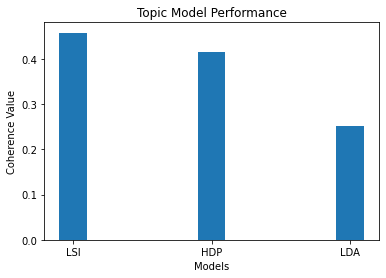

In [112]:
evaluate_bar_graph([lsi_coherence,hdp_coherence,lda_coherence],['LSI','HDP','LDA'])